# Final Project - Laptop Prices Dataset <hr style= "border:2px solid green">

Name: **Christian Jade Aguilar** <br>
Course: **CPE2A**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

## Data Cleaning

In [19]:
df = pd.read_csv(r"..\raw\laptops.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 10579 non-null  object 
 1   Processor             10601 non-null  object 
 2   RAM (GB)              10577 non-null  float64
 3   Storage               10559 non-null  object 
 4   GPU                   10620 non-null  object 
 5   Screen Size (inch)    10594 non-null  float64
 6   Resolution            10588 non-null  object 
 7   Battery Life (hours)  10595 non-null  float64
 8   Weight (kg)           10554 non-null  float64
 9   Operating System      10661 non-null  object 
 10  Price ($)             10576 non-null  float64
dtypes: float64(5), object(6)
memory usage: 1011.4+ KB


In [20]:
df.isna().sum()

Brand                   1189
Processor               1167
RAM (GB)                1191
Storage                 1209
GPU                     1148
Screen Size (inch)      1174
Resolution              1180
Battery Life (hours)    1173
Weight (kg)             1214
Operating System        1107
Price ($)               1192
dtype: int64

In [21]:
df = df.dropna(subset=['Brand','Processor','RAM (GB)','Storage','GPU',
                       'Screen Size (inch)','Resolution','Battery Life (hours)','Weight (kg)','Operating System','Price ($)'])
df.isna().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [22]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 3732 entries, 3 to 11764
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 3732 non-null   object 
 1   Processor             3732 non-null   object 
 2   RAM (GB)              3732 non-null   float64
 3   Storage               3732 non-null   object 
 4   GPU                   3732 non-null   object 
 5   Screen Size (inch)    3732 non-null   float64
 6   Resolution            3732 non-null   object 
 7   Battery Life (hours)  3732 non-null   float64
 8   Weight (kg)           3732 non-null   float64
 9   Operating System      3732 non-null   object 
 10  Price ($)             3732 non-null   float64
dtypes: float64(5), object(6)
memory usage: 349.9+ KB


In [23]:
df = df.copy()
df_cleaned = df.copy()

df['Price ($)'] = df['Price ($)'].replace({',': ''}, regex=True) #replacing comma with '' ex. 11,11=1111
df['Price ($)'] = pd.to_numeric(df['Price ($)'])

df_cleaned.to_csv(r"..\raw\cleaned_laptop.csv",index=False)

In [25]:
# Display descriptive statistics
print(df["Price ($)"].describe())

count     3732.000000
mean      2196.570019
std       1333.733888
min        279.570000
25%       1281.805000
50%       1855.870000
75%       2714.117500
max      10757.560000
Name: Price ($), dtype: float64


## **Price predictions model** <br>
 Predict the price of a laptop based on features like RAM, processor, GPU, storage, screen size, and battery life. 

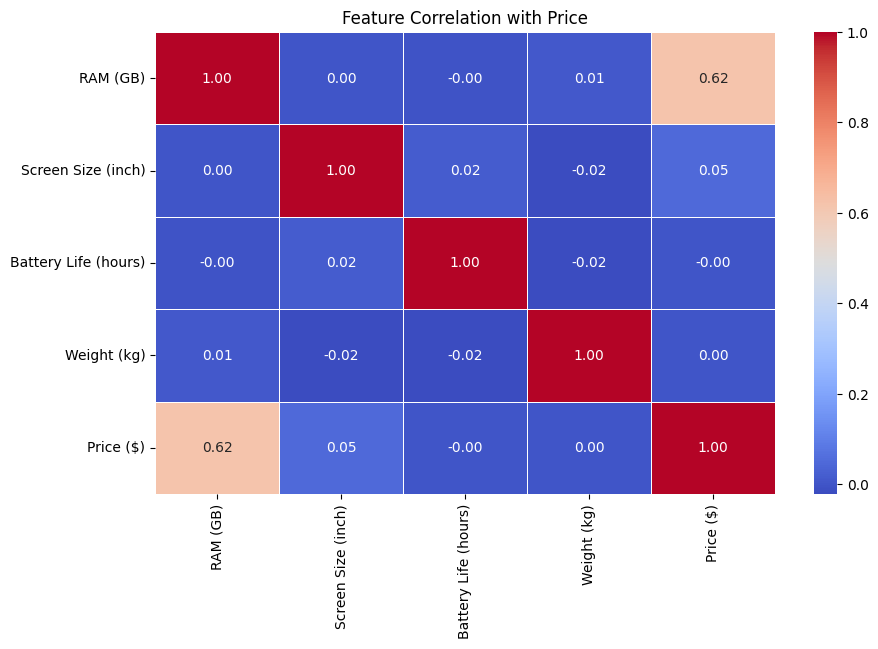

In [26]:
# Feature Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[["RAM (GB)", "Screen Size (inch)", "Battery Life (hours)", "Weight (kg)", "Price ($)"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation with Price")
plt.show()

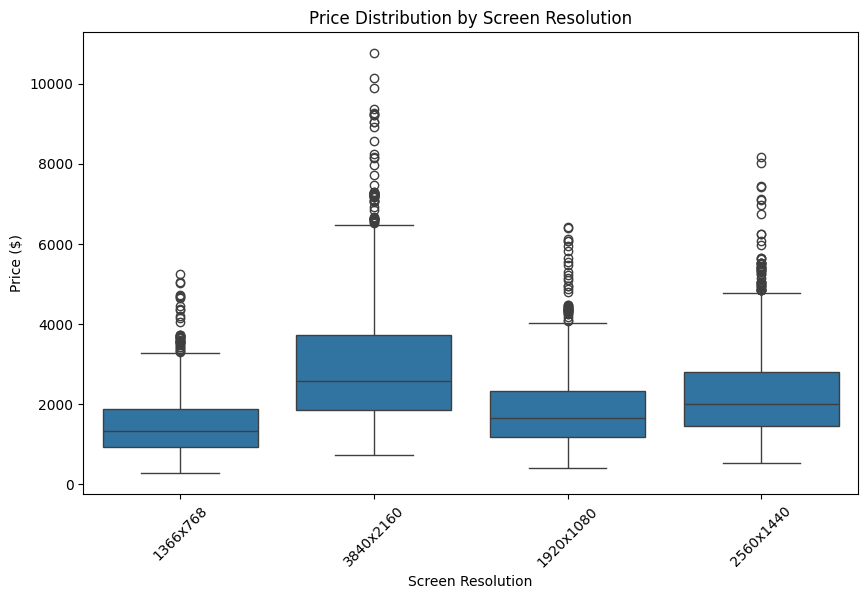

In [27]:
# Box Plot: Screen Resolution vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Resolution", y="Price ($)")
plt.xticks(rotation=45)
plt.title("Price Distribution by Screen Resolution")
plt.xlabel("Screen Resolution")
plt.ylabel("Price ($)")
plt.show()


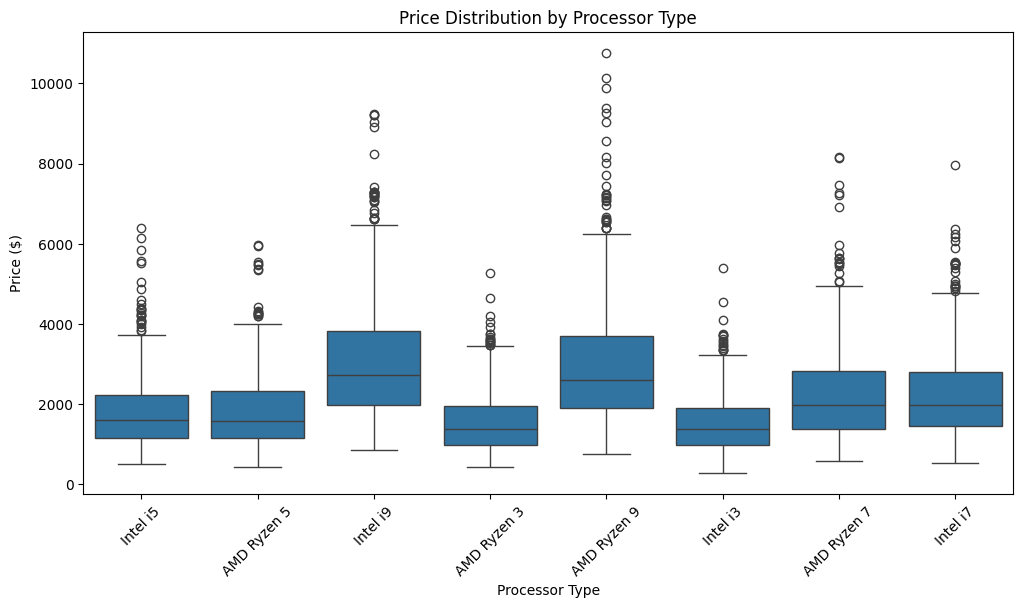

In [28]:
# Box Plot: Processor Type vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Processor", y="Price ($)")
plt.xticks(rotation=45)
plt.title("Price Distribution by Processor Type")
plt.xlabel("Processor Type")
plt.ylabel("Price ($)")
plt.show()

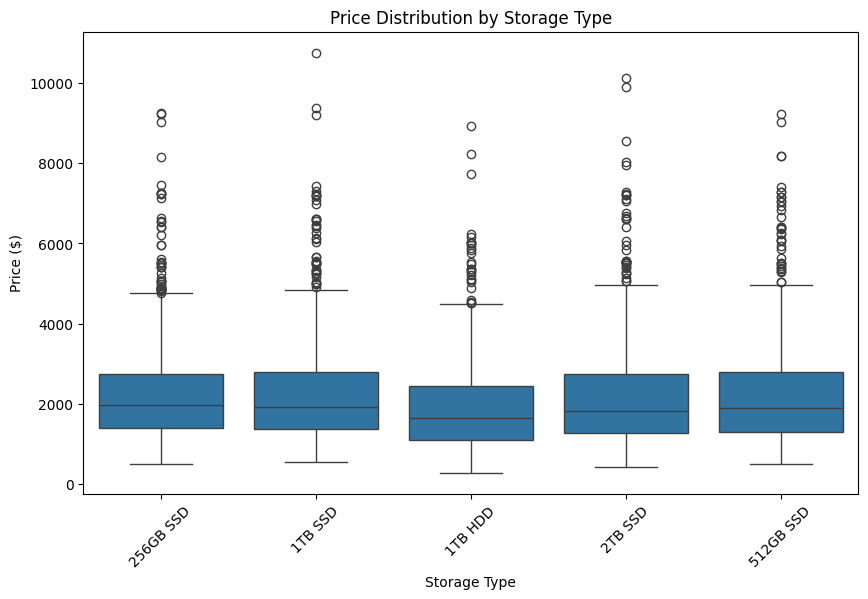

In [29]:
# Box Plot: Storage Type vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Storage", y="Price ($)")
plt.xticks(rotation=45)
plt.title("Price Distribution by Storage Type")
plt.xlabel("Storage Type")
plt.ylabel("Price ($)")
plt.show()


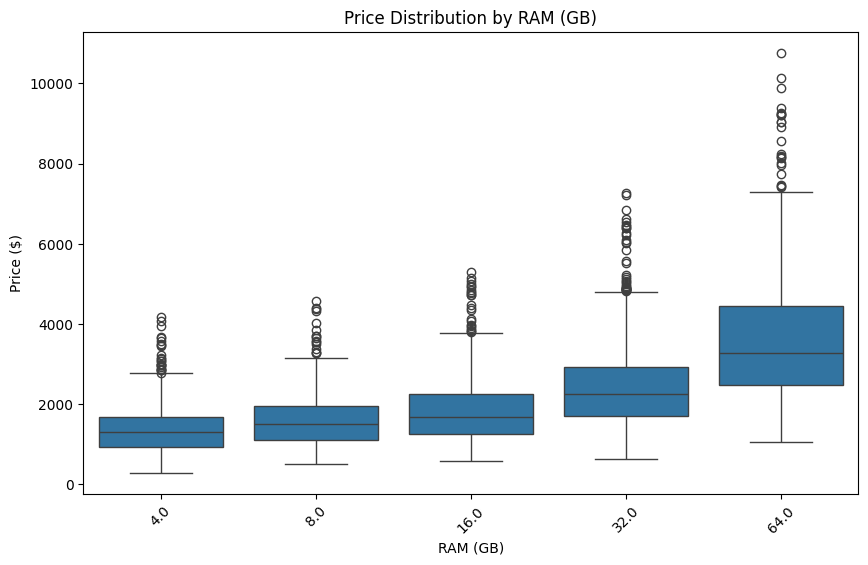

In [30]:
# Box Plot: RAM (GB) vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="RAM (GB)", y="Price ($)")
plt.xticks(rotation=45)
plt.title("Price Distribution by RAM (GB)")
plt.xlabel("RAM (GB)")
plt.ylabel("Price ($)")
plt.show()

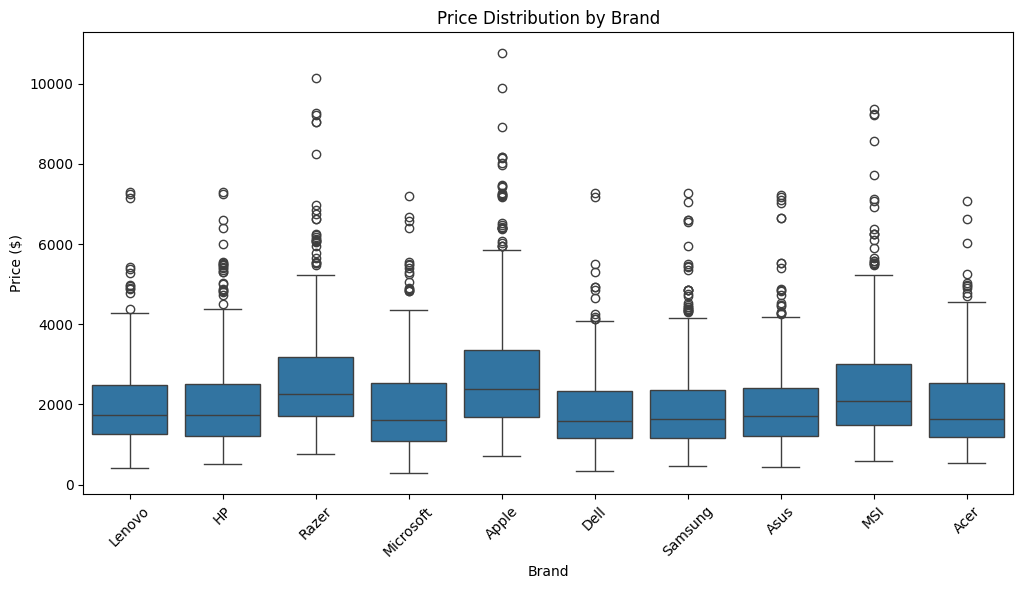

In [31]:
# Box Plot: Brand vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Brand", y="Price ($)")
plt.xticks(rotation=45)
plt.title("Price Distribution by Brand")
plt.xlabel("Brand")
plt.ylabel("Price ($)")
plt.show()

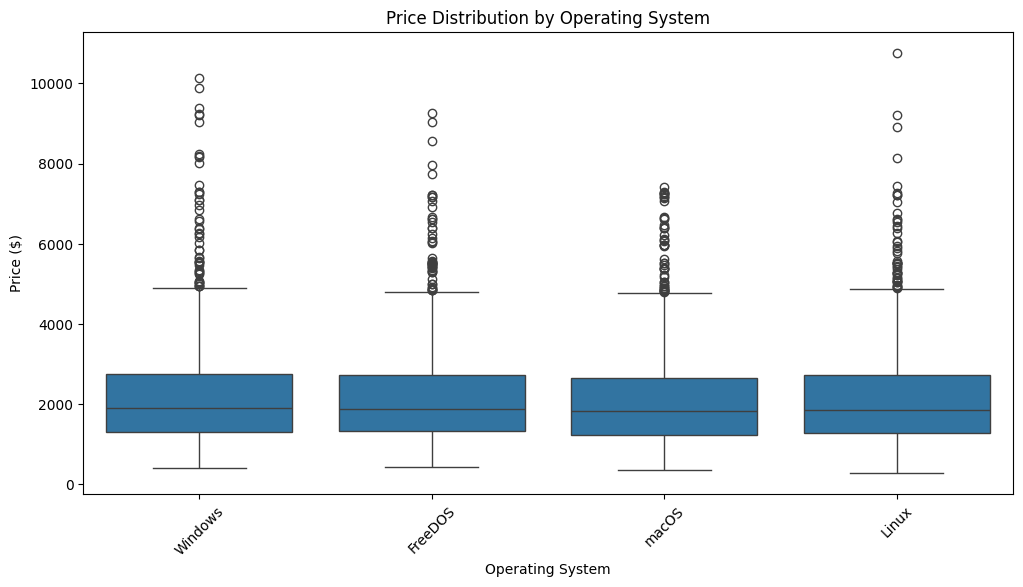

In [32]:
# Box Plot: Operating System vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Operating System", y="Price ($)")
plt.xticks(rotation=45)
plt.title("Price Distribution by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Price ($)")
plt.show()

## Trends analysis

 Impact of Laptop Features on Price Distribution

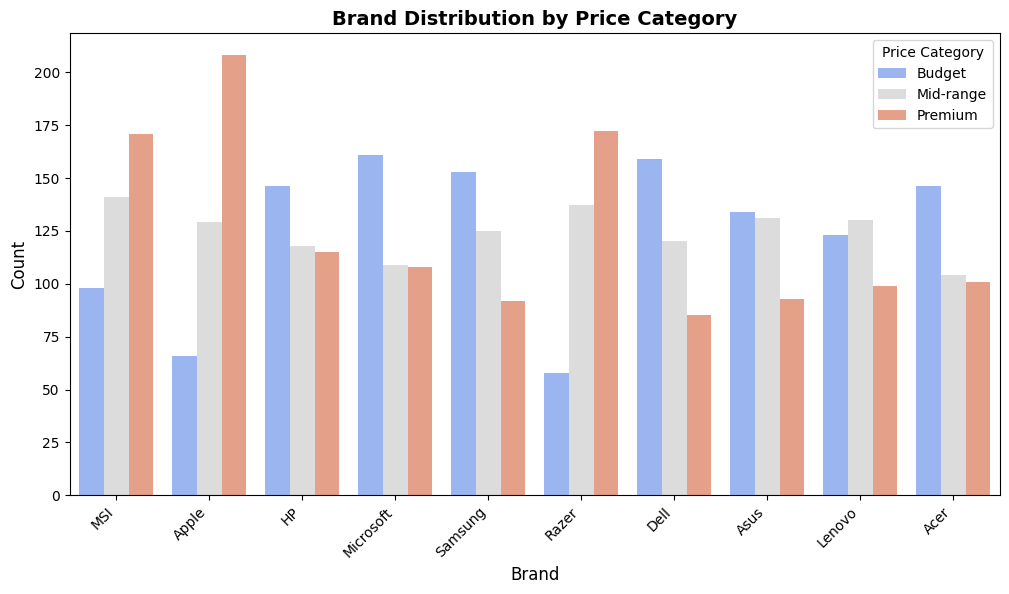

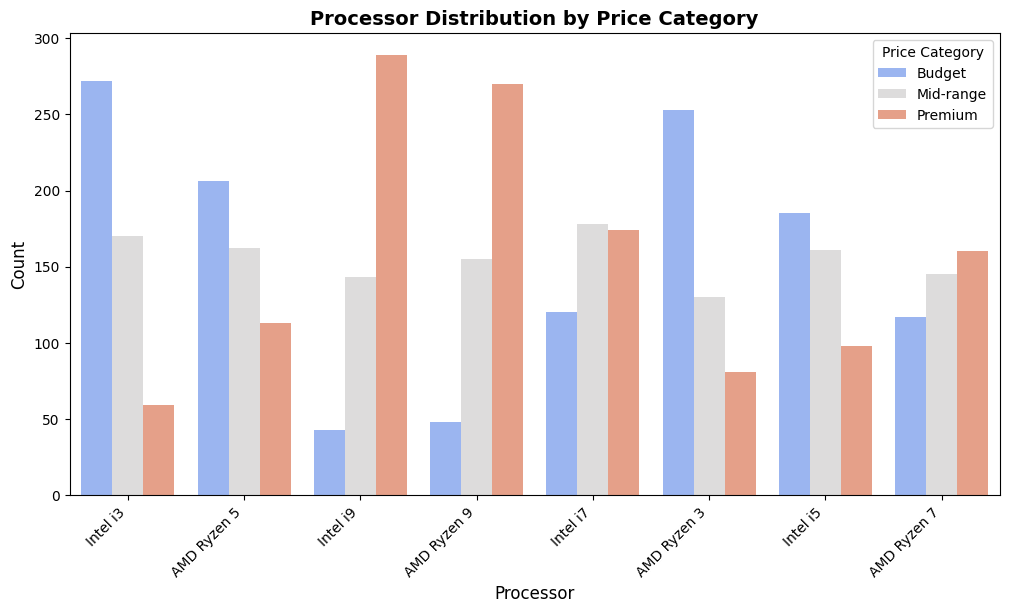

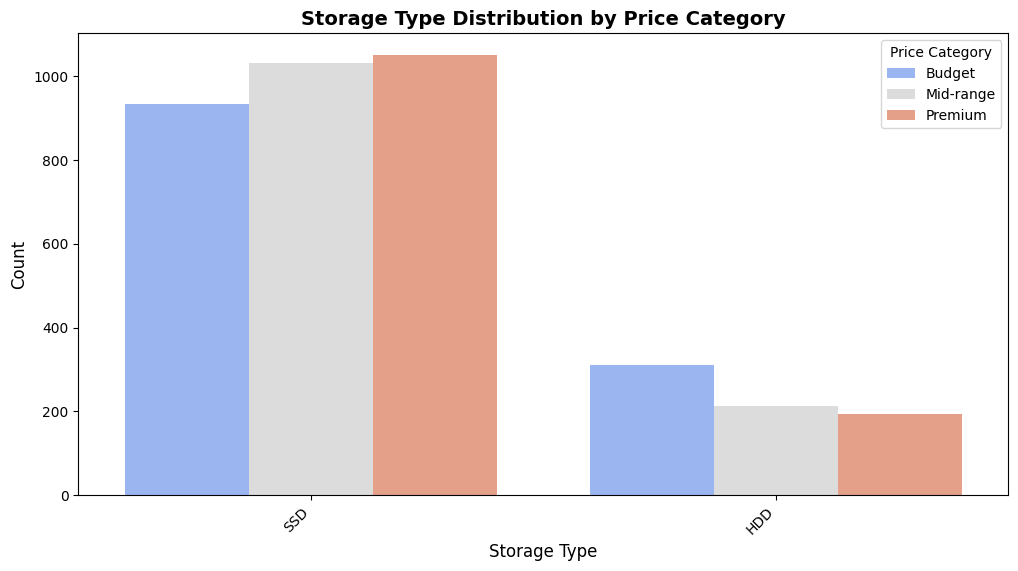

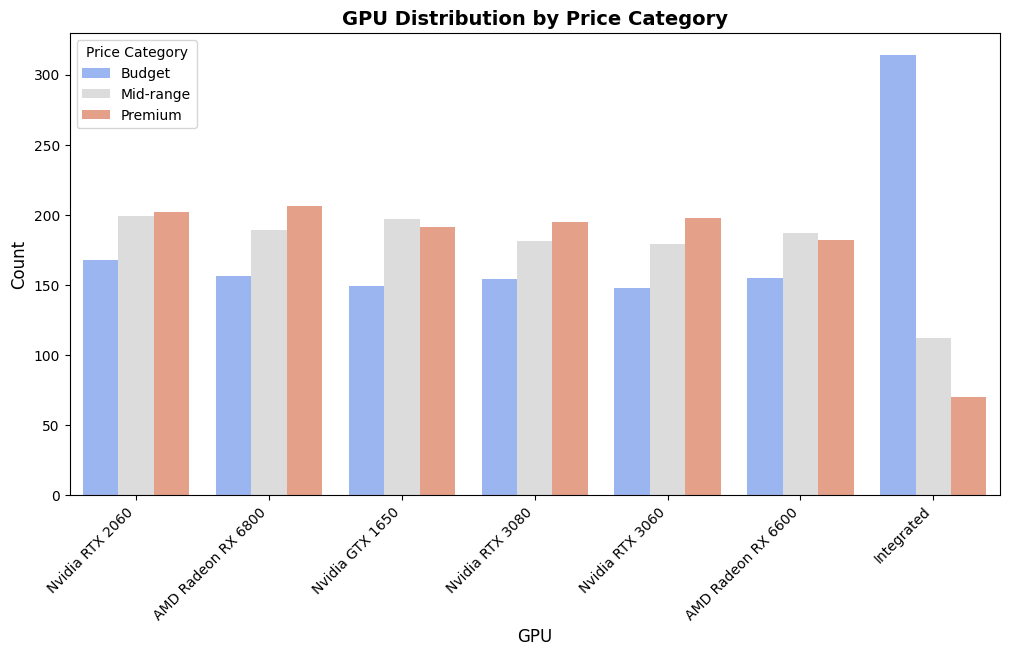

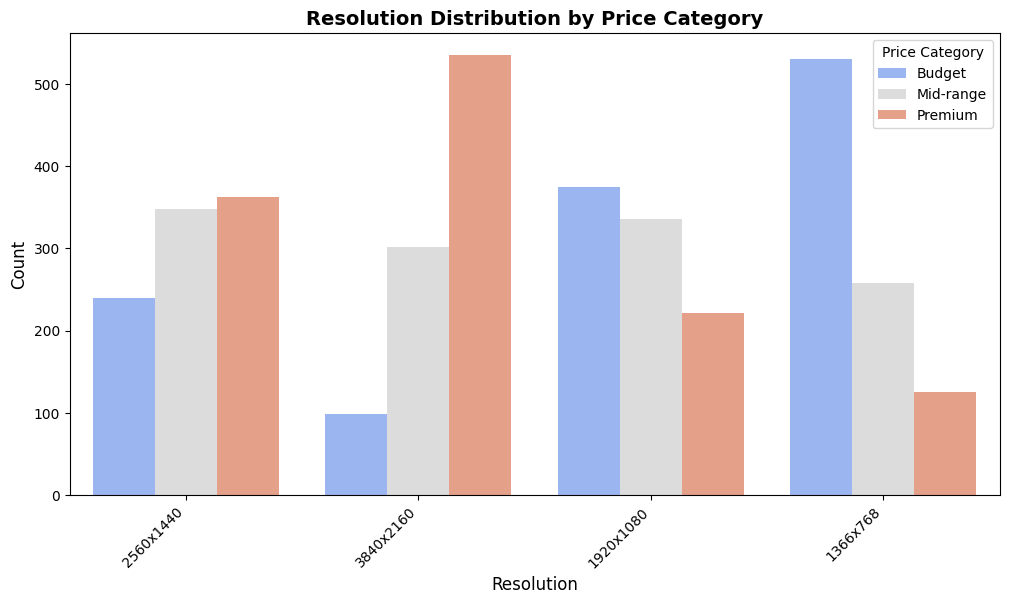

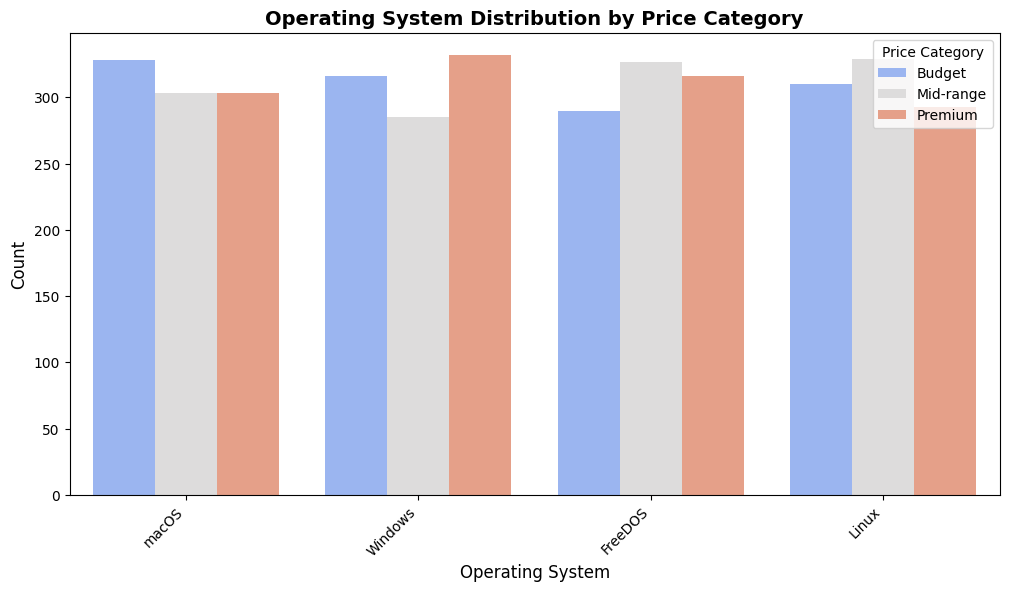

In [ ]:
df["Price Category"] = pd.qcut(df["Price ($)"], q=3, labels=["Budget", "Mid-range", "Premium"])

# Define categorical and numerical features
categorical_features = ["Brand", "Processor", "Storage Type", "GPU", "Resolution", "Operating System"]

# Set color palette
palette = "coolwarm"

# Generate count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=df[feature], hue=df["Price Category"], order=df[feature].value_counts().index, palette=palette)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{feature} Distribution by Price Category", fontsize=14, fontweight="bold")
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Price Category")
    plt.show()


The details is on the report